202331182 Izaaz Muhammad Razan

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pandas digunakan untuk mengelola data dalam bentuk tabel.
train_test_split digunakan untuk membagi data menjadi data latih dan uji.
StandardScaler untuk menormalkan data, sementara LabelEncoder mengonversi data kategorikal menjadi bentuk numerik.
SVC adalah model Support Vector Classifier yang akan digunakan untuk klasifikasi.
classification_report dan confusion_matrix akan mengevaluasi performa model, dan
matplotlib.pyplot serta seaborn digunakan untuk membuat visualisasi.

In [2]:
data = pd.read_csv('K03_counter_strike_2.csv')

Dataset "K03_counter_strike_2.csv" dimuat ke variabel data menggunakan pd.read_csv(), memungkinkan akses ke data dalam format DataFrame.

In [3]:
print(data.head())

   time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets round_winner  
0       0.0      0.0    4000.0   4000.0         0.0        0.0           CT  
1     400.0    300.0     600.0    650.0         0.0        0.0           CT  
2     294.0    200.0     750.0    500.0         0.0        0.0           CT  
3     294.0    200.0     750.0    500.0         0.0        0.0           CT  
4     192.0      0.0   18350.0  10750.0         0.0        0.0           CT  


Menampilkan lima baris pertama dari dataset untuk memeriksa struktur data dan beberapa nilai awal.

In [4]:
print( data.isnull().sum())

time_left       0
ct_score        0
t_score         0
map             0
bomb_planted    0
ct_health       0
t_health        0
ct_armor        0
t_armor         0
ct_money        0
t_money         0
ct_helmets      0
t_helmets       0
round_winner    0
dtype: int64


Menghitung jumlah nilai yang hilang dalam setiap kolom menggunakan data.isnull().sum(). Jika ada nilai yang hilang, ini akan ditampilkan sehingga dapat ditangani jika diperlukan.

In [5]:
label_encoder = LabelEncoder()
data['map'] = label_encoder.fit_transform(data['map'])

Label encoding pada kolom map, mengubah data kategorikal di kolom tersebut menjadi angka sehingga dapat digunakan oleh model SVM. LabelEncoder memberi setiap kategori nilai numerik unik.

In [6]:
X = data.drop('round_winner', axis=1)
Y = data['round_winner']

Memisahkan data menjadi variabel fitur (X) dan label (Y). X berisi semua kolom kecuali round_winner (kolom target),
sedangkan Y hanya berisi kolom round_winner.

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Normalisasi pada variabel fitur X menggunakan StandardScaler. Ini mengubah skala data sehingga memiliki rata-rata 0 dan standar deviasi 1,
yang membantu SVM bekerja lebih baik pada data yang memiliki skala berbeda.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Membagi dataset menjadi data latih dan uji. test_size=0.2 berarti 20% data akan digunakan untuk pengujian, sementara random_state=42 memastikan hasil pembagian yang konsisten.

In [9]:
model = SVC(kernel='rbf')

Mendefinisikan model SVM dengan kernel ‘rbf’ (Radial Basis Function), kernel ini populer untuk kasus klasifikasi non-linear.

In [10]:
model.fit(X_train, Y_train)

SVC()

Melatih model SVM pada data latih X_train dan Y_train.

In [11]:
Y_pred = model.predict(X_test)

Menggunakan model yang telah dilatih untuk memprediksi label pada data uji X_test.

In [12]:
print( classification_report(Y_test, Y_pred))
print( confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

          CT       0.78      0.69      0.73       156
           T       0.81      0.88      0.84       244

    accuracy                           0.80       400
   macro avg       0.80      0.78      0.79       400
weighted avg       0.80      0.80      0.80       400

[[107  49]
 [ 30 214]]


Menampilkan laporan klasifikasi yang merangkum metrik evaluasi seperti precision, recall, dan F1-score, serta mencetak matriks kebingungan (confusion matrix) untuk melihat distribusi prediksi benar dan salah.

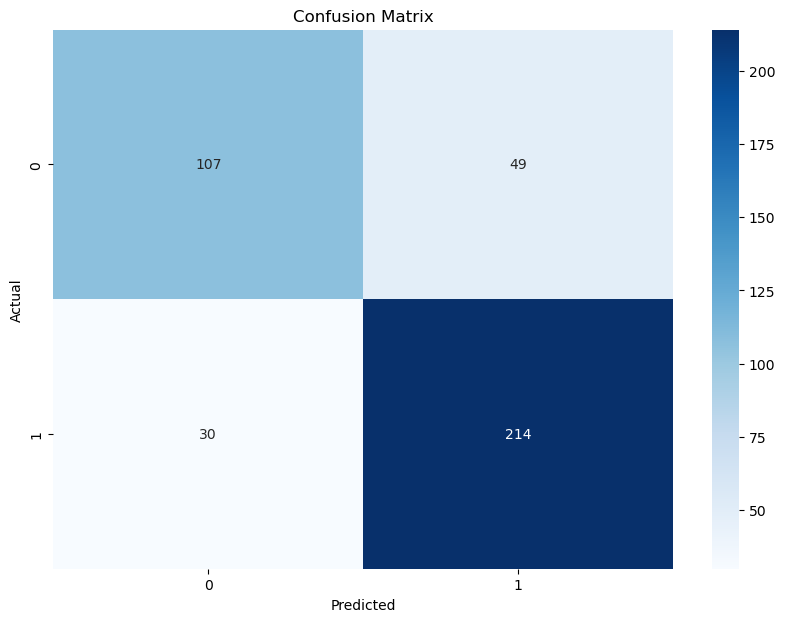

In [13]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Membuat visualisasi matriks confusion sebagai heatmap. Ukuran plot diatur menjadi 10x7 inci, kemudian menggunakan seaborn untuk membuat heatmap dengan anotasi angka pada setiap kotak, diwarnai dengan palet Blues. Judul dan label sumbu disesuaikan, dan plt.show() menampilkan plot.